In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
file_path = './CSV/CVE/0010_jackson-databind_dependents_releaseWise.csv'
df = pd.read_csv(file_path)

In [21]:
df

,releaseID,targetVersion,dependentCount,releaseDate,releaseTimestamp
0,"""com.fasterxml.jackson.core:jackson-databind""","""2.0.0-RC1""",15,"""2012-02-19T08:05:21Z""",1329638721000
1,"""com.fasterxml.jackson.core:jackson-databind""","""2.0.0-RC2""",15,"""2012-03-06T07:02:08Z""",1331017328000
2,"""com.fasterxml.jackson.core:jackson-databind""","""2.0.0-RC3""",14,"""2012-03-23T00:19:13Z""",1332461953000
3,"""com.fasterxml.jackson.core:jackson-databind""","""2.0.0""",558,"""2012-03-25T19:11:24Z""",1332702684000
4,"""com.fasterxml.jackson.core:jackson-databind""","""2.0.1""",196,"""2012-04-24T02:17:59Z""",1335233879000
...,...,...,...,...,...
193,"""com.fasterxml.jackson.core:jackson-databind""","""2.16.2""",1472,"""2024-03-09T18:54:12Z""",1710010452000
194,"""com.fasterxml.jackson.core:jackson-databind""","""2.17.0""",7105,"""2024-03-12T21:53:32Z""",1710280412000
195,"""com.fasterxml.jackson.core:jackson-databind""","""2.12.7.2""",166,"""2024-05-02T20:10:51Z""",1714680651000
196,"""com.fasterxml.jackson.core:jackson-databind""","""2.17.1""",7273,"""2024-05-05T02:07:56Z""",1714874876000


In [4]:
df['releaseDate'] = df['releaseDate'].str.strip('"')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
df['year'] = df['releaseDate'].dt.year
dependents_data = df[['year','dependentCount']]

In [5]:
dependents_data

,year,dependentCount
0,2012,15
1,2012,15
2,2012,14
3,2012,558
4,2012,196
...,...,...
193,2024,1472
194,2024,7105
195,2024,166
196,2024,7273


In [6]:
yearly_data = dependents_data.groupby('year')[['dependentCount']].sum().reset_index()

print(yearly_data)

    year  dependentCount
0   2012            2718
1   2013            7412
2   2014           15445
3   2015           24376
4   2016           35720
5   2017           37059
6   2018           62726
7   2019          104302
8   2020          157337
9   2021          100090
10  2022          138360
11  2023          136039
12  2024           35106


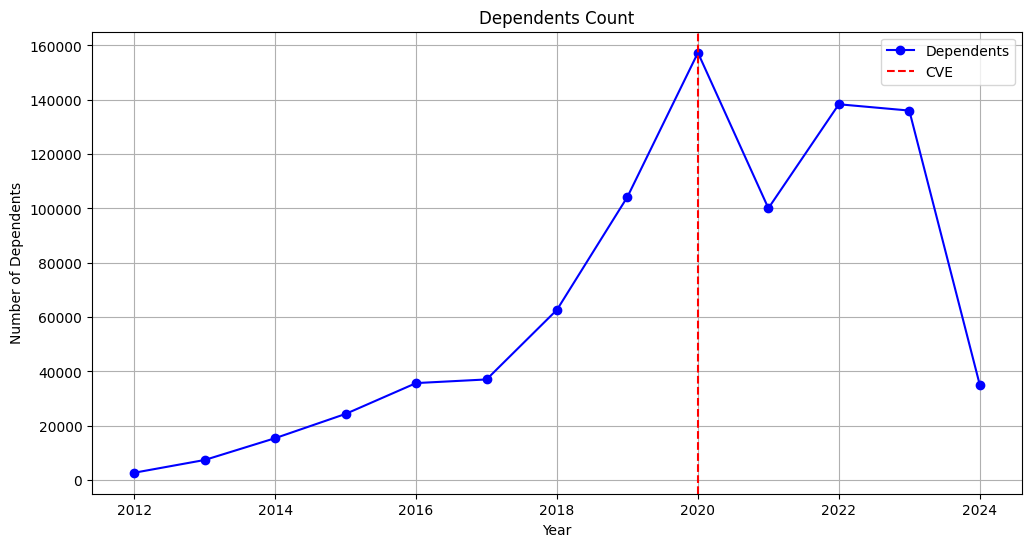

In [11]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data['year'],yearly_data['dependentCount'], marker='o', label='Dependents', color='blue')

cve_year = 2020

# Add average dependency count line
plt.axvline(x=cve_year, color='r', linestyle='--', label='CVE')

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df['rhythm'] = 0
for i in range(0, len(df)-1):
    df.at[i,'rhythm'] = (df.at[i+1,'releaseDate'] - df.at[i, 'releaseDate']).days

In [23]:
rhythm_data = df[['year','rhythm']]

In [24]:
rhythm_data

,year,rhythm
0,2012,15
1,2012,16
2,2012,2
3,2012,29
4,2012,20
...,...,...
193,2024,3
194,2024,50
195,2024,2
196,2024,61


In [25]:
rhythm_data = rhythm_data.groupby('year')[['rhythm']].sum().reset_index()

print(rhythm_data)

    year  rhythm
0   2012     328
1   2013     401
2   2014     298
3   2015     360
4   2016     360
5   2017     370
6   2018     473
7   2019     226
8   2020     362
9   2021     417
10  2022     316
11  2023     383
12  2024     138


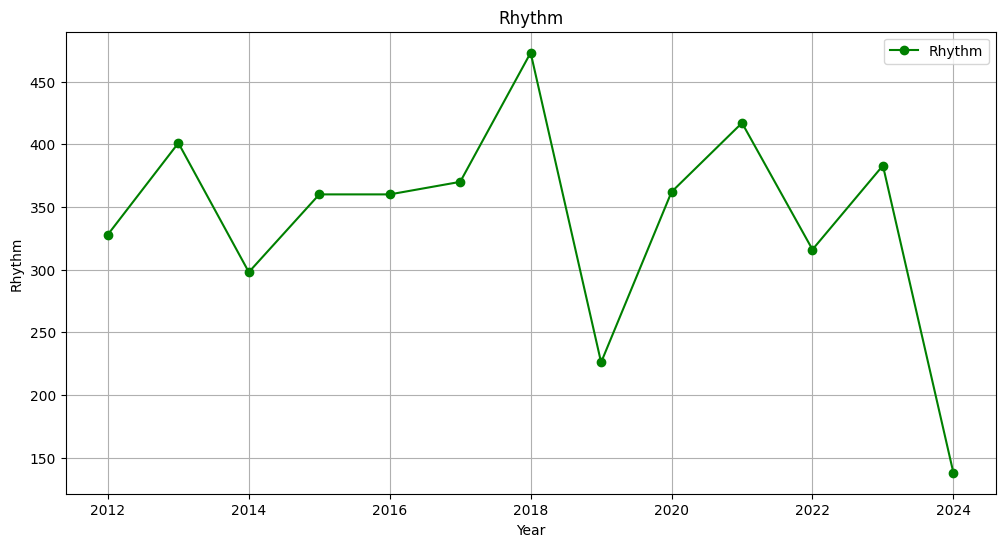

In [27]:
plt.figure(figsize = (12,6))
plt.plot(rhythm_data['year'],rhythm_data['rhythm'], marker='o', label='Rhythm', color='green')

plt.title('Rhythm')
plt.xlabel('Year')
plt.ylabel('Rhythm')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
rhythm_df = pd.DataFrame()
rhythm_df['releaseDate'] = df['releaseDate'].dt.strftime('%Y-%m')
rhythm_df['rhythm'] = df ['rhythm']

In [39]:
rhythm_df

,releaseDate,rhythm
0,2012-02,15
1,2012-03,16
2,2012-03,2
3,2012-03,29
4,2012-04,20
...,...,...
193,2024-03,3
194,2024-03,50
195,2024-05,2
196,2024-05,61


In [40]:
rhythm_df = rhythm_df.groupby('releaseDate')[['rhythm']].sum().reset_index()

In [41]:
rhythm_df

,releaseDate,rhythm
0,2012-02,15
1,2012-03,47
2,2012-04,20
3,2012-05,43
4,2012-06,30
...,...,...
102,2023-12,53
103,2024-02,22
104,2024-03,53
105,2024-05,63


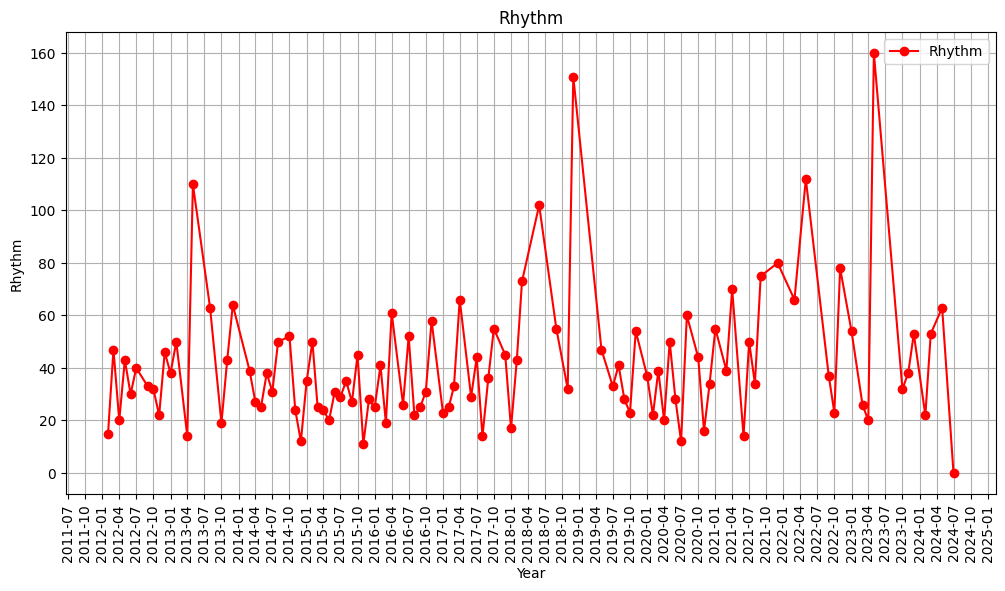

In [58]:
# Ensure 'releaseDate' is in datetime format
rhythm_df['releaseDate'] = pd.to_datetime(rhythm_df['releaseDate'])

# Create date range with 3-month intervals
start_date = '2019-01'
end_date = rhythm_df['releaseDate'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='3M').to_pydatetime()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rhythm_df['releaseDate'], rhythm_df['rhythm'], marker='o', label='Rhythm', color='red')

# Setting title and labels
ax.set_title('Rhythm')
ax.set_xlabel('Year')
ax.set_ylabel('Rhythm')
ax.legend()
ax.grid(True)

# Set x-ticks at 3-month intervals and format
ax.set_xticks(date_range)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Locator for 3-month intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

plt.xticks(rotation=90)
plt.show()

In [12]:
file_path = './CSV/CVE/0003_scala-library_dependents_releaseWise.csv'
df = pd.read_csv(file_path)

In [13]:
df['releaseDate'] = df['releaseDate'].str.strip('"')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
df['year'] = df['releaseDate'].dt.year
dependents_data = df[['year','dependentCount']]

In [14]:
yearly_data = dependents_data.groupby('year')[['dependentCount']].sum().reset_index()

print(yearly_data)

    year  dependentCount
0   2008             172
1   2009            2114
2   2010            4619
3   2011            9101
4   2012           14109
5   2013           17242
6   2014           33857
7   2015           82853
8   2016           72439
9   2017          205001
10  2018           98494
11  2019          123900
12  2020          255246
13  2021          285355
14  2022          261871
15  2023           77725
16  2024           34356


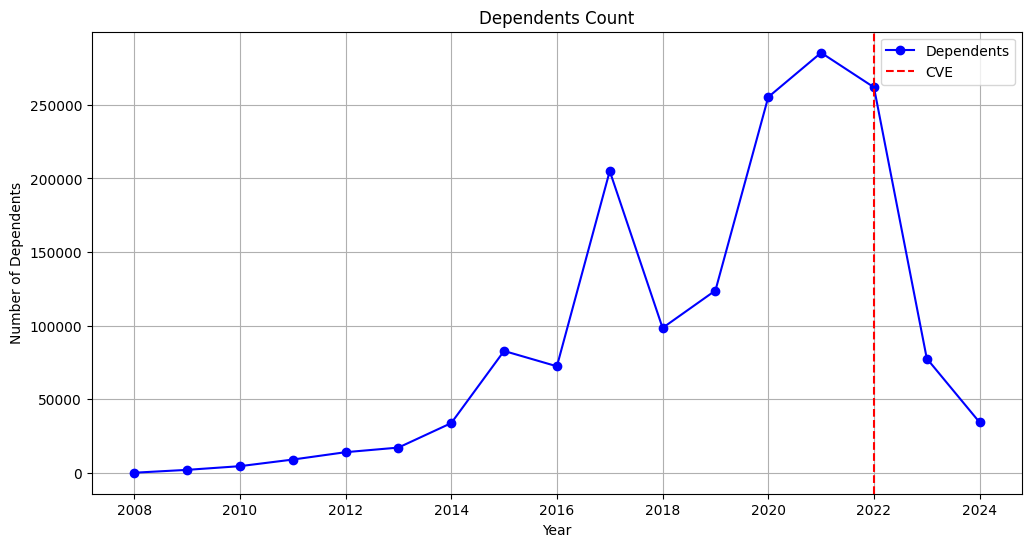

In [16]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data['year'],yearly_data['dependentCount'], marker='o', label='Dependents', color='blue')

cve_year = 2022

# Add average dependency count line
plt.axvline(x=cve_year, color='r', linestyle='--', label='CVE')

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
file_path = './CSV/CVE/0027_log4j-core_dependents_releaseWise.csv'
df = pd.read_csv(file_path)

In [23]:
df['releaseDate'] = df['releaseDate'].str.strip('"')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
df['year'] = df['releaseDate'].dt.year
dependents_data = df[['year','dependentCount']]

yearly_data = dependents_data.groupby('year')[['dependentCount']].sum().reset_index()

print(yearly_data)

    year  dependentCount
0   2012              82
1   2013             790
2   2014            2590
3   2015           10657
4   2016           12450
5   2017           36520
6   2018           25326
7   2019           25118
8   2020           29272
9   2021          284965
10  2022           32484
11  2023           47155
12  2024           13834


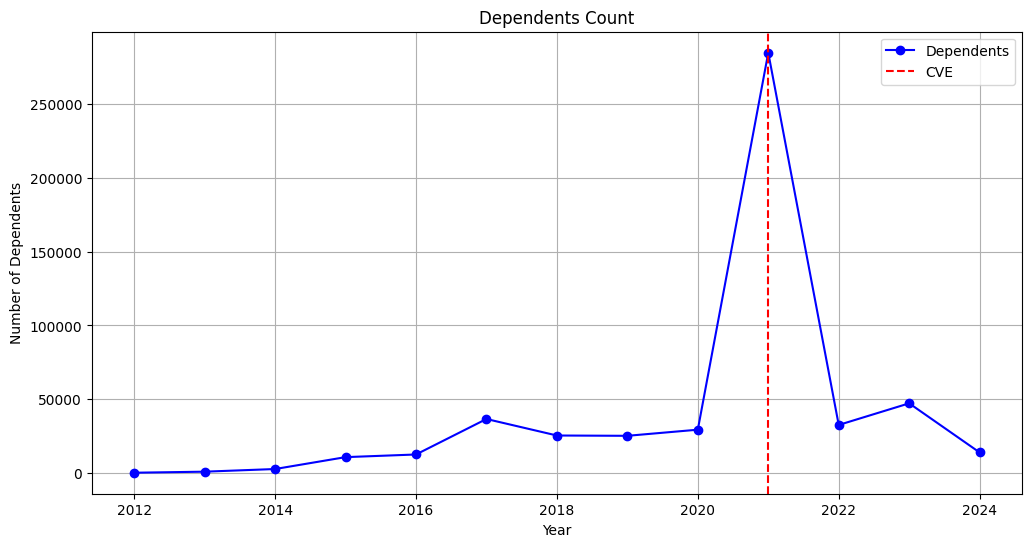

In [24]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data['year'],yearly_data['dependentCount'], marker='o', label='Dependents', color='blue')

cve_year = 2021

# Add average dependency count line
plt.axvline(x=cve_year, color='r', linestyle='--', label='CVE')

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()